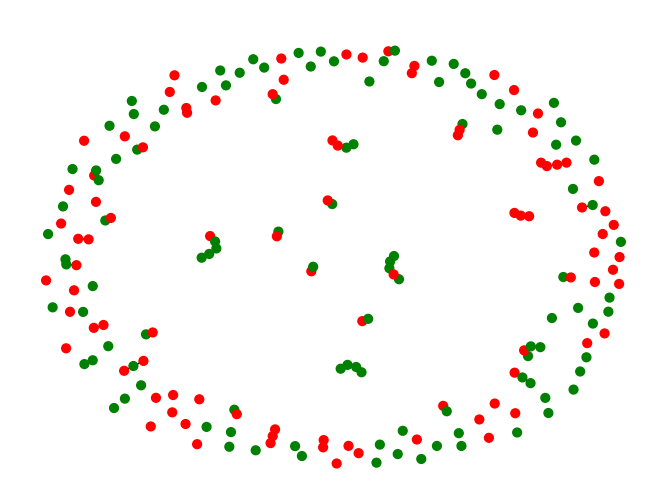

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5603 - loss: 0.6677 - val_accuracy: 0.9312 - val_loss: 0.5634
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9791 - loss: 0.5193 - val_accuracy: 1.0000 - val_loss: 0.3466
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.2917 - val_accuracy: 1.0000 - val_loss: 0.1398
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.1159 - val_accuracy: 1.0000 - val_loss: 0.0597
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0532 - val_accuracy: 1.0000 - val_loss: 0.0296
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0314  

Test Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Negative


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Load data
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')
labels = pd.read_csv('labels.csv')

# Merge labels with node info
data = pd.merge(nodes, labels, on='user_id')

# Build graph
G = nx.Graph()
G.add_nodes_from(data['user_id'])
G.add_edges_from(edges[['user_id1', 'user_id2']].values)

# Draw colored subgraph
nodes = data['user_id'][:200]
colors = data[data['user_id'].isin(nodes)]['label'].map({0: 'red', 1: 'green'})
nx.draw(G.subgraph(nodes), node_color=colors, node_size=40, with_labels=False)
plt.show()


# Prepare text data
tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
X = pad_sequences(tokenizer.texts_to_sequences(data['text']), maxlen=15)
y = data['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# RNN model
model = Sequential([
    Embedding(2000, 32, input_length=15),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

# Prediction function
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=15)
    pred = model.predict(padded)[0][0]
    return 'Positive' if pred > 0.5 else 'Negative'

# Examples
print(predict_sentiment("I love this!"))
print(predict_sentiment("This is awful"))

